# Outdoors Instance Segmentation using YOLOv11

## Introduction

This notebook will guide you through using YOLOv11 (You Only Look Once) Algorithm to segment outdoor objects such as person, car, cycle, footpath, etc by training the YOLO model on a custom Roboflow dataset which contains over 19 different classes.

## Credits

- Dataset: [Roboflow](https://universe.roboflow.com/capstone-project-kxh1v/custom-object-detect-1)
- Reference: [Roboflow](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)
- Model: [Ultralytics](https://github.com/ultralytics/ultralytics)

## Table of Contents

- [Introduction](#introduction)
- [Prerequisites](#prerequisites)
- [Installing YOLOv11](#installing-yolov11)
- [Getting the Dataset](#getting-the-dataset)
- [Sample Inference](#sample-inference)
- [Training](#training)
- [Testing](#testing)
- [Validation](#validation) 
- [Performance](#performance)  
- [Usage](#usage)

## Prerequisites

We'll be using following tools for this notebook
- Ultralytics YOLOv11 Model
- Roboflow Car parts Dataset

Make sure you have access to GPU for faster computation. Run `nvidia-smi` command and check if you get output something like following

In [ ]:
!nvidia-smi

Check Current Working Directory Path

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Installing YOLOv11

Ultralytics package includes all necessary libraries and dependencies used to run YOLOv11. So installation is quite simple

In [ ]:
!pip install ultralytics

Make sure that ultralytics is installed correctly

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.8.10 torch-2.0.0+cu117 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)
Setup complete ✅ (64 CPUs, 376.6 GB RAM, 120.9/136.5 GB disk)


## Getting the Dataset

We'll be using Car parts Dataset from Roboflow Universe for our notebook. The dataset is downloaded from [here](https://universe.roboflow.com/segmentation-9q8ob/car-parts-llqro/dataset/1)

- Name: Car parts Dataset
- Format: YOLOv11
- Images count: 1755
- Image size: 416x416
- Classes count: 9
- Train/Val/Test Distribution: 70%:20%:10%

Download the dataset from given link inside your current working directory and rename the folder to 'Cars'

## Sample Inference

Now we're all set to run YOLO model. Let's test our installation on a sample image. We'll use a YOLO model pretrained on COCO dataset for inferencing

**NOTE:** There are two ways to use YOLO models
- Using CLI commands
- Using Python code

For more extensibility, we'll be using YOLO model with Python. Read more about CLI method in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/)

I'll be using a sample image from web. You can use any image for this.

**NOTE:** The image used here should contain atleast one entity from COCO classes. Refer [COCO](https://cocodataset.org/) dataset for checking available classes.

In [4]:
from ultralytics import YOLO
from PIL import Image
import supervision as sv

Let's first see the original image

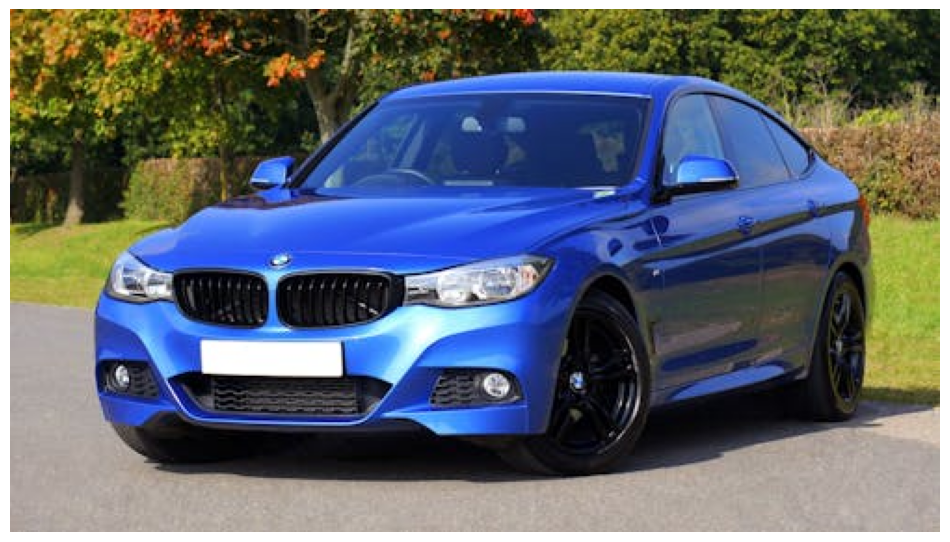

In [5]:
sample = Image.open(f'sample.jpeg')
sv.plot_image(sample)

Now let's try running pretrained YOLO model on this image

In [ ]:
model = YOLO('yolo11n-seg.pt')
results = model.predict(source=f'sample.jpeg', conf=0.25)

Let's plot the detection result what the model found out.

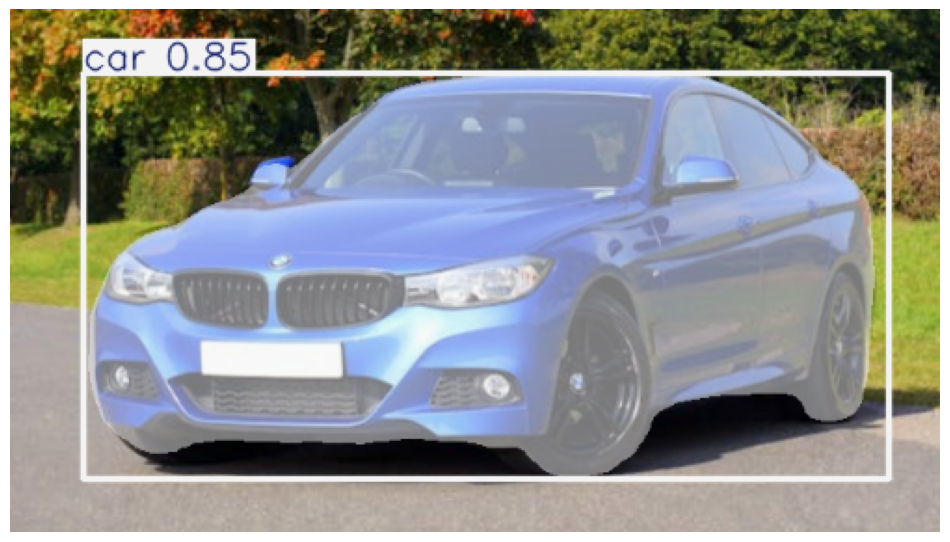

In [7]:
sv.plot_image(results[0].plot())

The pretrained model is trained to segment car as a whole. Now let's train it to segment car parts.

## Training

Let's now train our model on the custom dataset. Pass the following hyperparameters in the train function
- epochs: Number of epochs
- lr0: Initial learning rate
- lrf: Final learning rate
- imgsz: Square input image size
- batch: Input Batch size
- save: To save the learned weights at checkpoints
- device: To select computation device(CPU/GPU)

In [ ]:
results = model.train(data=f'{HOME}/Cars/data.yaml', epochs=20, lr0=0.02, lrf=0.01, imgsz=416, batch=8, device=0, optimizer='AdamW')

Training is completed. Now let's visualize the training process

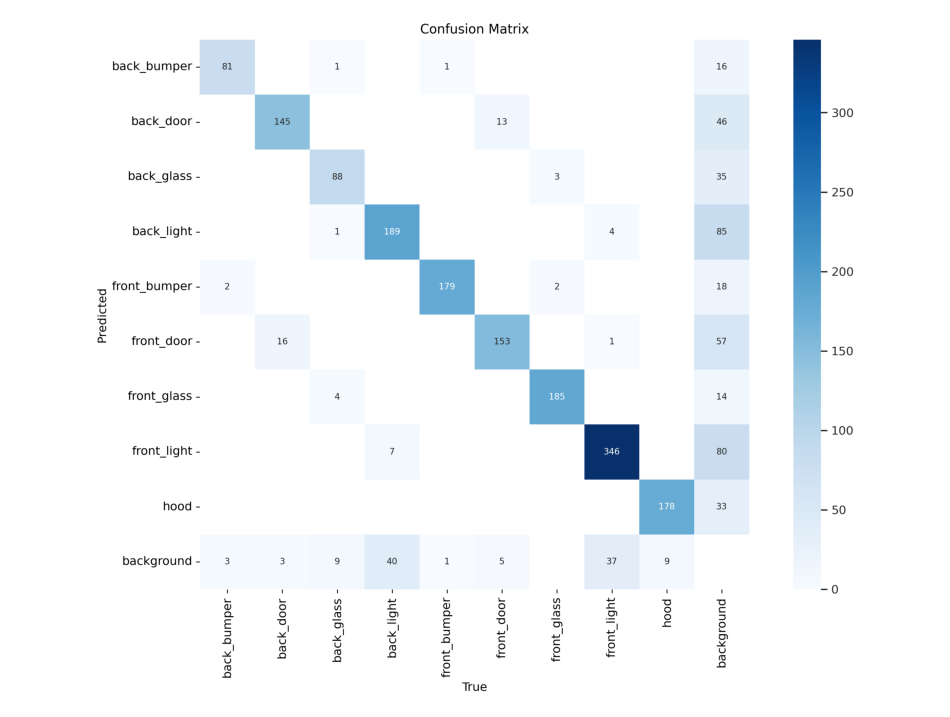

In [19]:
sv.plot_image(Image.open(f'{HOME}/runs/segment/train9/confusion_matrix.png'))

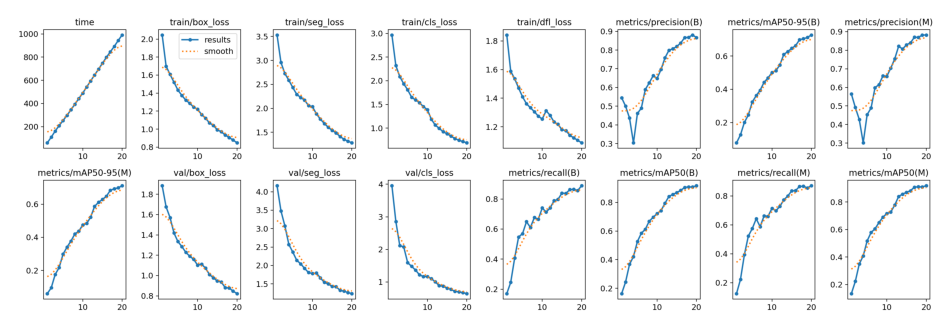

In [20]:
sv.plot_image(Image.open(f'{HOME}/runs/segment/train9/results.png'))

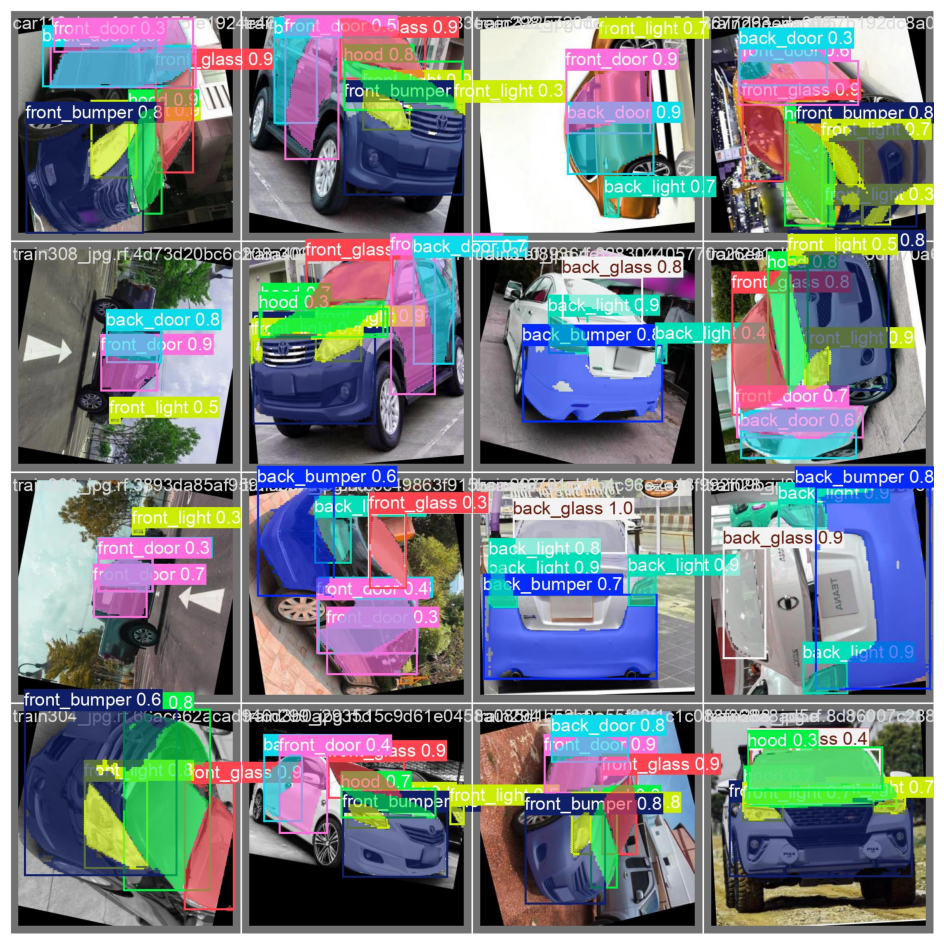

In [21]:
sv.plot_image(Image.open(f'{HOME}/runs/segment/train9/val_batch0_pred.jpg'))

## Validation

Let's check the performance of our trained model on validation set

In [ ]:
# Load a model
model = YOLO(f"{HOME}/runs/segment/train9/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

We got an excellent mAP50 value of 91.7% on validation set.

## Testing

Let's run the model on our sample image

In [ ]:
model = YOLO(f'{HOME}/runs/segment/train9/weights/best.pt')
results = model.predict(source=f'sample.jpeg', conf=0.5)
sv.plot_image(results[0].plot())

## Performance

YOLO provides a detailed visualisation of the model performance. Check out `runs/segment/train` folder for training performance, and `runs/segment/val` folder for validation performance.

We achieved a mAP of 0.917 which is sufficiently reliable for any object detection task.

## Usage

YOLO weights are now upgraded to segment Car parts. Now you can use the trained weights for detecting Electronic components.

The trained weights are stored in `runs/segment/train/weights/best.pt` file. To use the trained weights on you images, first load the weights in a YOLO model. Then, use the model to segment objects in your images.

## Portable Weights

Now you can use you trained model any any machine with ultralytics installed. Just copy the weights `runs/detect/train/weights/best.pt` to your machine and load the YOLO model with those weights.

Your model is now ready to _look_ at the images